In [41]:
import pandas as pd
import numpy as np
import IPython.display as dispaly
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import xgboost as xgb
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from __future__ import division
%matplotlib inline

In [2]:
full_data=pd.read_csv('/home/ashwin/Downloads/movies/movie_metadata.csv')

In [3]:
list(full_data)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [4]:
full_data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

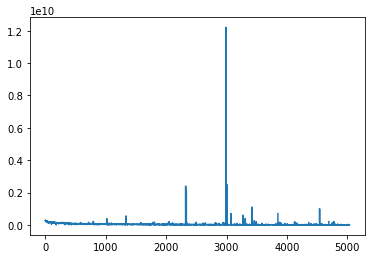

In [6]:
plt.plot(full_data['budget'])

In [7]:
numerical_var=[x for x in full_data.columns if 
               full_data.dtypes[x] != 'object']

In [8]:
catagorical_var=[x for x in full_data.columns if x not in numerical_var]
catagorical_var

['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'language',
 'country',
 'content_rating']

In [9]:
print len(catagorical_var)
print len(numerical_var)
print len(full_data.columns)

12
16
28


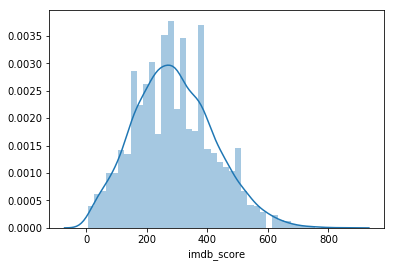

In [10]:
sns.distplot(full_data['imdb_score']**3)
plt.show()

In [11]:
print (full_data['imdb_score']**2).skew()

In [12]:
print full_data.kurt()
print '--------------------'
print full_data.skew()

num_critic_for_reviews          2.913416
duration                       22.565797
director_facebook_likes        27.256289
actor_3_facebook_likes         60.563888
actor_1_facebook_likes        683.547356
gross                          14.868869
num_voted_users                24.445520
cast_total_facebook_likes     361.255115
facenumber_in_poster           52.033735
num_user_for_reviews           26.438297
budget                       2724.257433
title_year                      7.439213
actor_2_facebook_likes        256.795189
imdb_score                      0.935692
aspect_ratio                   90.653221
movie_facebook_likes           41.334437
dtype: float64
--------------------
num_critic_for_reviews        1.516533
duration                      2.339134
director_facebook_likes       5.229701
actor_3_facebook_likes        7.279021
actor_1_facebook_likes       19.121776
gross                         3.127204
num_voted_users               4.029871
cast_total_facebook_likes    12.831

In [13]:
print pd.isnull(full_data[numerical_var]).sum()
print '--------------------------'
print pd.isnull(full_data[catagorical_var]).sum()

In [14]:
full_data['gross']=full_data['gross'].fillna(0)
full_data['budget']=full_data['budget'].fillna(0)
full_data['title_year']=full_data['title_year'].fillna(0)
full_data['aspect_ratio']=full_data['aspect_ratio']\
    .fillna(full_data['aspect_ratio'].mean())
full_data['content_rating']=full_data['content_rating'].fillna('R')
full_data['color']=full_data['color'].fillna('Color')
full_data[numerical_var]=full_data[numerical_var]\
    .fillna(full_data[numerical_var].mean())

In [15]:
full_data=full_data.dropna()
full_data.shape

(4773, 28)

In [16]:
full_data['actor_1_movie_fb_likes']=(full_data['actor_1_facebook_likes']\
        *full_data['movie_facebook_likes']).astype(np.float64)
full_data['actor_2_movie_fb_likes']=(full_data['actor_2_facebook_likes']\
        *full_data['movie_facebook_likes']).astype(np.float64)
full_data['actor_3_movie_fb_likes']=(full_data['actor_3_facebook_likes']\
        *full_data['movie_facebook_likes']).astype(np.float64)
full_data['director_name_fb_likes']=(full_data['director_facebook_likes']\
        *full_data['movie_facebook_likes']).astype(np.float64)

In [17]:
full_data['actor_1_name_imdb_score']=(full_data[['actor_1_name','imdb_score']].groupby('actor_1_name').mean()).astype(np.float64)
full_data['actor_2_name_imdb_score']=(full_data[['actor_2_name','imdb_score']].groupby('actor_2_name').mean()).astype(np.float64)
full_data['actor_3_name_imdb_score']=(full_data[['actor_3_name','imdb_score']].groupby('actor_3_name').mean()).astype(np.float64)
full_data['director_name_imdb_score']=(full_data[['director_name','imdb_score']].groupby('director_name').mean()).astype(np.float64)

In [18]:
updating_coloumns=['actor_1_name_imdb_score','actor_2_name_imdb_score',
                   'actor_3_name_imdb_score','director_name_imdb_score']
refered_coloumns=['actor_1_name','actor_2_name','actor_3_name','director_name']
k=0
for j in updating_coloumns:
    temp=refered_coloumns[k]
    a=(full_data[[refered_coloumns[k],'imdb_score']].groupby(refered_coloumns[k]).mean()).astype(np.float64)
    index_mapping={}
    for i in list(a.index):
        index_mapping[i]= a.loc[i,'imdb_score']
    full_data[j]=full_data[refered_coloumns[k]].map(index_mapping)
    k=k+1

In [19]:
print full_data.shape

(4773, 36)


In [20]:
dropping_var=['director_name','actor_2_name','actor_1_name'
    ,'movie_title','actor_3_name','plot_keywords','movie_imdb_link' ]
full_data=full_data.drop(dropping_var,axis=1)
print full_data.shape

In [21]:
numerical_var=[x for x in full_data.columns if 
               full_data.dtypes[x] != 'object']
catagorical_var=[x for x in full_data.columns if x not in numerical_var]

In [22]:
print catagorical_var
print '-----------------'
print numerical_var

['color', 'genres', 'language', 'country', 'content_rating']
-----------------
['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'actor_1_movie_fb_likes', 'actor_2_movie_fb_likes', 'actor_3_movie_fb_likes', 'director_name_fb_likes', 'actor_1_name_imdb_score', 'actor_2_name_imdb_score', 'actor_3_name_imdb_score', 'director_name_imdb_score']


In [23]:
full_data=pd.get_dummies(full_data)

In [24]:
skewed=full_data[numerical_var].apply(lambda x:stats.skew(x.dropna()))
skewed=skewed[skewed>0.75]
skewed1=skewed[skewed<-0.75]
print skewed1
skewed=skewed.index
skewed1=skewed1.index
full_data[skewed1]=full_data[skewed1]**3
full_data[skewed]=np.log1p(full_data[skewed])

Series([], dtype: float64)


In [25]:
full_data.shape

In [26]:
x=full_data
y=full_data['imdb_score']
x=x.drop(['imdb_score'],axis=1)

In [27]:
x_train,x_test,y_train,y_test=\
    train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
print x_train.shape,y_train.shape
print '---------------'
print x_test.shape,y_test.shape

(3341, 1018) (3341,)
---------------
(1432, 1018) (1432,)


In [30]:
clf=RandomForestRegressor(n_estimators=500)
clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [30]:
feature_imp_mapping={}
for features,importance in zip(full_data.columns, clf.feature_importances_):
    if importance!=0:
        feature_imp_mapping[features]=importance
    

importances = pd.DataFrame.from_dict(feature_imp_mapping, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance')
importances.index

Index([u'genres_Adventure|Animation|Comedy|Family|Sci-Fi',
       u'genres_Adventure|Horror|Sci-Fi', u'genres_Drama|Sci-Fi|Thriller',
       u'genres_Adventure|Comedy|Family|Fantasy|Horror',
       u'genres_Adventure|Comedy|Family|Musical',
       u'genres_Action|Adventure|Fantasy|Thriller',
       u'genres_Adventure|Family|Sport',
       u'genres_Adventure|Fantasy|Mystery|Thriller', u'genres_Drama|Fantasy',
       u'genres_Action|Drama|Sci-Fi|Sport',
       ...
       u'genres_Adventure|Comedy|Drama|Fantasy',
       u'genres_Action|Adventure|Fantasy|Horror|Thriller',
       u'genres_Animation|Comedy|Family|Musical',
       u'genres_Action|Comedy|Mystery|Romance',
       u'genres_Action|Drama|Fantasy|Mystery|Sci-Fi|Thriller',
       u'genres_Adventure|Mystery|Thriller',
       u'genres_Drama|Family|Fantasy|Romance', u'language_Mongolian',
       u'genres_Crime|Drama|Romance|Thriller',
       u'genres_Adventure|Animation|Comedy|Drama|Family|Fantasy'],
      dtype='object', length=758)

In [32]:
plt.figure(figsize=(10,200))
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(importances.index)), importances['Gini-importance'], color='b', align='center')
plt.yticks(range(len(importances.index)), importances.index)
plt.xlabel('Relative Importance')
plt.savefig('/home/ashwin/Downloads/imp.png')
plt.show()

In [36]:
x_train=x_train[['actor_2_name_imdb_score',   
'actor_3_movie_fb_likes',
'director_name_fb_likes',
'gross',
'duration',
'budget',
'actor_1_name_imdb_score',
'title_year',
'num_user_for_reviews',
'actor_3_name_imdb_score',
'actor_2_facebook_likes',
'director_facebook_likes',
'num_critic_for_reviews',
'num_voted_users']]
x_test=x_test[['actor_2_name_imdb_score',   
'actor_3_movie_fb_likes',
'director_name_fb_likes',
'gross',
'duration',
'budget',
'actor_1_name_imdb_score',
'title_year',
'num_user_for_reviews',
'actor_3_name_imdb_score',
'actor_2_facebook_likes',
'director_facebook_likes',
'num_critic_for_reviews',
'num_voted_users']]

In [42]:
gbm = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
colsample_bytree=1, max_depth=7).fit(x_train, y_train)
predictions = gbm.predict(x_test)

In [43]:
print(explained_variance_score(predictions,y_test))

0.856738785024


In [46]:
d={'predictions':predictions,
   'actual':y_test}
data_predicted_actual=pd.DataFrame(d)

In [47]:
data_predicted_actual

,actual,predictions
131,6.9,6.176903
2733,7.0,7.040465
3510,7.9,7.506603
1225,6.4,5.959352
1390,6.7,6.061008
418,6.0,6.204505
3975,7.3,7.305436
3233,6.5,5.152883
3865,5.9,6.265110
4621,5.7,6.554415
